## Multi-panel figures

## Learning outcomes

* Making multi-panel figures using `plt.subplot()`
    - change plot orientation
    - modifying ticks
    - inverting an axis
* Making multi-panel figures using `plt.subplots()` (note the plural)
    - plotting in axex panels
    - adjusting the layout to accommodate annotations
    - using `subplot_mosaic()`
    - getting finer control with a `gridspec`
    - (optional) adding axes panels manually with a `gridspec`

We will often want to put multiple panels in a figure. In fact, take a look at the current issue of [Nature](https://www.nature.com/nature/articles?type=letter) (generally regarded as the top scientific journal in the world), and you will see *all* of the figures shown in the article listing have multiple panels. The reason is quite simply that, in general, there are multiple aspects of a single data set, experiment, etc., that tell a single story together. It is thus more effective to have these multiple aspects conveyed in a single figure so that the reader can appreciate these aspects and their interrelationships together.

In this tutorial, we will go through the most basic of making multi-panel figures using `matplotlib`, and we'll go to through next two in the next tutorial. The three methods offer a trade-off between ease and simplicity on the one hand power and flexibility on the other. Which you use for projects in the future will depend largely on your own preference and the task and hand.

As always, we need to import the needed libraries to get going.

In [3]:
# first things first
import numpy as np
import matplotlib.pyplot as plt

Next, we're going to make some data to play with. Don't worry about the code just yet – we can just think about as a black box data generator for now. You can come back and see if you can make sense of it once we've played with the data a little bit.

In [2]:
### make some data to play with
my_means = [0, 0]
my_cov = [[2, -1.9], [-1.9, 3]]
my_n = 5000

my_rng = np.random.default_rng()
x, y = my_rng.multivariate_normal(my_means, my_cov, my_n).T
y = y**2

After running the above, we should have two vectors of data, `x` and `y`, each of which contain 5000 data points.


---


In the code cell below, confirm the shapes of `x` and `y`.

In [ ]:
# how big are our variables?

In [4]:
x.shape

(5000,)

In [5]:
y.shape

(5000,)

---

### Review: looking at data with individual figures

First, let's examine the data with the "quickie" single plot tools we already have. First, we'll make a histogram of `x`.

To save time and code clutter, we'll break our "always annotate plots" rule and only annotate when it illustrates something about multi-plot figures. 

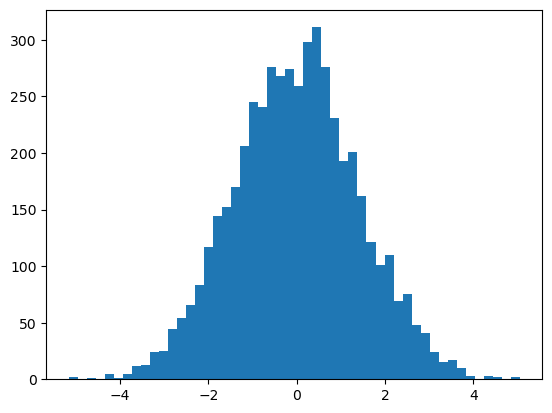

In [7]:
# histogram of x
plt.hist(x, bins=50);

---

In the cells below, make a histogram of `y`.

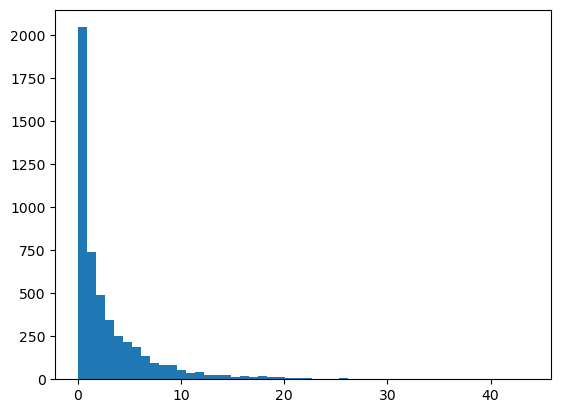

In [9]:
# histogram of y 
plt.hist(y, bins=50);

Clearly, these two sets of data have distributions of very different shape. Still, it might be easier to compare them if we put them on the same plot. Use the code cell below to plot them together. Set the `alpha` for both to something below 0.5 so you can see the overlapping regions.

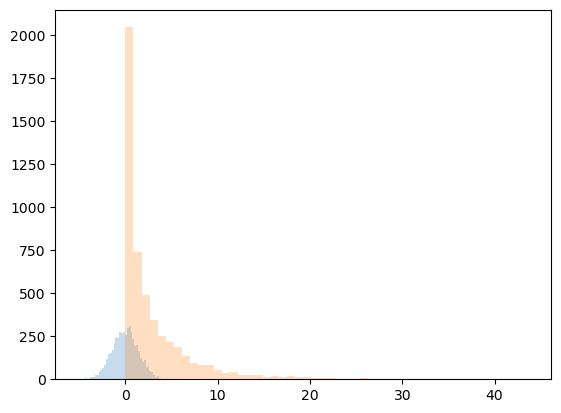

In [11]:
# both histograms on the same plot.
plt.hist(x, bins=50, alpha=.25);
plt.hist(y, bins=50,alpha=.25);

Before we move on, let's consider this plot some more. Both x and y have 5000 points, so why is the distribution of y so much higher? Play around with the binwidth of one or both histograms until you have a plot that you think conveys both the relative heights and shapes of the two distributions fairly well.

Now let's plot the relationship between x and y using `plt.scatter()`! There are going to be a ***lot*** of data points that occlude other data points in the default plot. So, after making the initial plot, play around with the `alpha` and size (`s = `) parameters until you get a plot you are happy with.

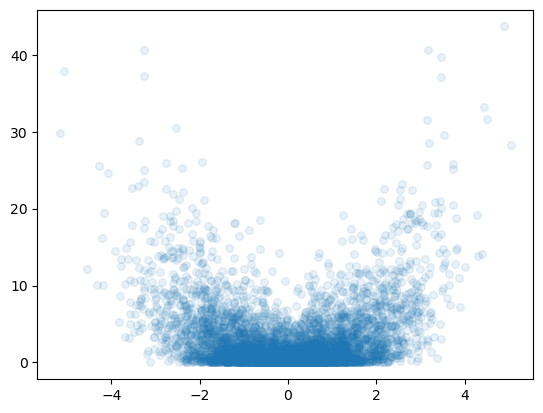

In [26]:
# scatter plot of x,y
plt.scatter(x,y, alpha=.10, s= 30)

Here, we can see that there *is* a relationship between x and y. Large positive values of y seem to occur at large absolute values of x, giving the data a bowl or parabolic shape overall. Moreover, while most x values seem to cluster between -2 and +2, the y values seem to tend towards small positive values and cut off rather sharply at 0.

---

It would be nice if we could show all the plots above on the same figure, so we could appreciate the both the distributions of x and y (without regard to the other) and the x,y relationship at once.

## Multi-panel figures with `subplot()`

The first tool we can use to make a multi-panel figure is `subplot()`. In it's basic use, `plt.subplot(nrows, ncols, index)` creates an `nrows`-by-`ncols` matrix of subplot locations in the current figure, and makes an `axes` at the location specified by `index`. The locations are numbered left-to-right, top-to-bottom. If a figure doesn't exist, a new one is created.

Let's run this:

<Axes: >

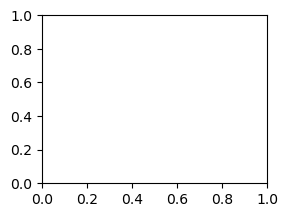

In [27]:
plt.subplot(2,2,1)

That made a new figure with 2x2 grid of potential plot locations, created an `axes` at location 1 (top left) and made it "live", meaning that any plotting would go in that `axes`. 

Because there are no other `axes` objects in the figure, Jupyter isn't showing us the whole figure.

Note: Throughout, when we mean "axes" or "axis" in the generic sense, the words will be in plain text. When we mean them in the `matplotlib` sense, they will be typeset as code: `axes`, `axis`.

Let's try this:

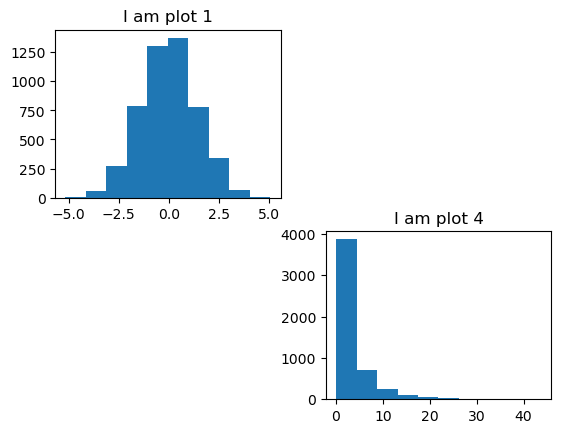

In [28]:
plt.subplot(2,2,1)       # makes a figure with a 2x2 grid of potential locations, 
                         # makes an axex at location 1, and sets it to "live"

plt.title('I am plot 1')
plt.hist(x);

plt.subplot(2,2,4)      # makes an axes at location 4 and sets it to "live"
plt.title('I am plot 4')
plt.hist(y);

You can jump around the plots if you wish:

Text(0.0, 1000, 'Back to plot 1!')

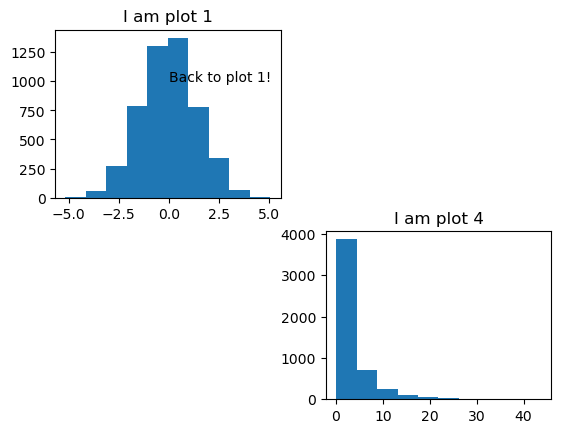

In [29]:
plt.subplot(2,2,1)
plt.title('I am plot 1')
plt.hist(x);

plt.subplot(2,2,4)
plt.title('I am plot 4')
plt.hist(y);

plt.subplot(2,2,1)
plt.text(0.0, 1000, 'Back to plot 1!')


Personally, we think it's more clear to make one plot live, do everything your going to do to that plot, and then move on to the next plot. However, some people might prefer to, say, go through the figures once to do all the plotting, and then cycle through them again to do the annotating, etc. You do you.

#### all axes panels in one figure

Let's put all three of our graphs in one figure:

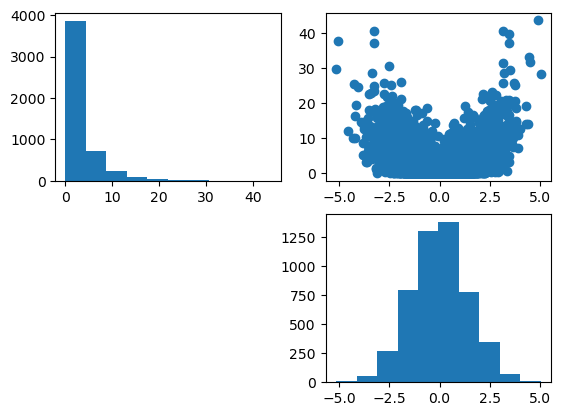

In [30]:
plt.subplot(2,2,1)
plt.hist(y);

plt.subplot(2,2,4)
plt.hist(x);

plt.subplot(2,2,2)
plt.scatter(x,y);

Not bad. The visual comparison of the x distribution with the scatter plot is nice, because the horizontal axis of each plot lines up with the other. That's not true for out y values however. Let's fix that.

#### adjusting the orientation of a subplot

The big problem we have with our figure is that our y variable values run up and down in the scatter plot (which is how we want them), but left and right on our histogram. 


---

In the code cell below, recycle the code from above, but try setting an `orientation` argument to `'horizontal'` in the call to make the y histogram.

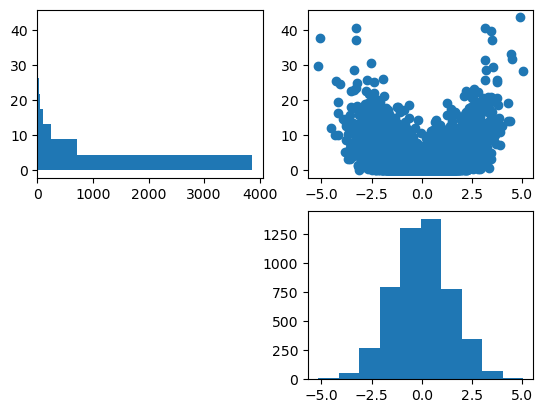

In [33]:
plt.subplot(2,2,1)
plt.hist(y, orientation='horizontal');

plt.subplot(2,2,4)
plt.hist(x);

plt.subplot(2,2,2)
plt.scatter(x,y);

---

#### turning ticks off

A good general rule for graphics is that the cleaner, the better. Notice that in the above plots, the x axis is shared by the right two plots, and the y axis is shared by the top two plots. So we can remove some redundancy and visual clutter by turning some ticks off.

There is a `yticks()` and an `xticks()` method in `matplotlib.pyplot` (which we have imported as `plt`) that allows us to specify tick marks. If we give it an empty list, there will be no ticks!

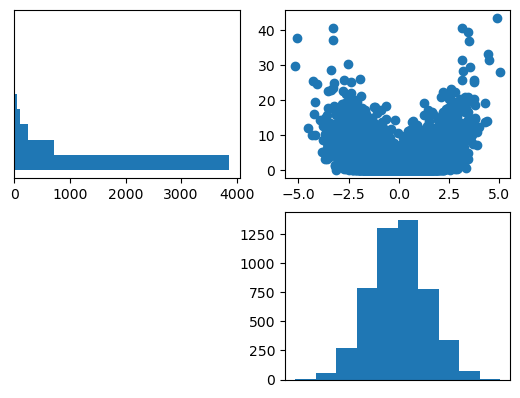

In [35]:
plt.subplot(2,2,1)
plt.hist(y, orientation = 'horizontal');  # make the histogram bars horizontal
plt.yticks([])                            # eliminate the y ticks

plt.subplot(2,2,4)
plt.hist(x);
plt.xticks([])

plt.subplot(2,2,2)
plt.scatter(x,y);

After running the code above, modify it to remove the x ticks from the histogram of x values and re-run it.

#### inverting an axis

Visually, it is nice to have the corresponding axes next to one another on the figure. In the plot above, we can do this for the y value histogram by flipping the axis of counts so that zero is to the right and higher counts go to the left.

While `plt` can do certain things to the current `axes` (like plot in it), or even to an `axis` in its `axes` (like turn off the ticks), some things need to be done by the `axes` itself, like inverting an `axis`.

So, in order to flip some `axis`, we are going to assign our own names to the `axes` objects, and then call on them to accomplish our goal.

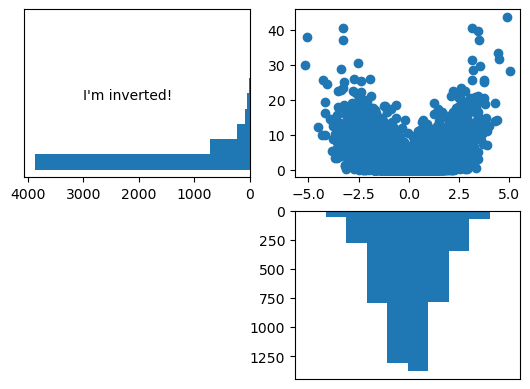

In [38]:
yhist_ax = plt.subplot(2,2,1)             # name our y histogram axes object 'yhist_ax'
plt.hist(y, orientation = 'horizontal');
plt.yticks([])
yhist_ax.invert_xaxis()                   # have the axes invert its x axis
plt.text(3000, 20, 'I\'m inverted!')

xhist_ax = plt.subplot(2,2,4)
plt.hist(x);
plt.xticks([])
xhist_ax.invert_yaxis()

plt.subplot(2,2,2)
plt.scatter(x,y);

Modify the above code to flip the y axis of our x values histogram too!

Remember that `matplotlib` is a hierarchy of `artists`. Though not strictly an `artist`, `plt` sits at the top. 

    * `plt` - the creator and evil overlord that can do many things, but not all things
    * `figure` - contains the `axes` objects
    * `axes` - contains the plots and `axis` objects
    * `axis` - has ticks, upper and lower limits, etc.
    
So if you want to do something 

    1. see if maybe `plt` can do it
    2. look for methods at the right level. 
    
For example, if you wanted to change the background of the whole figure, you would look at the figure level, whereas if you wanted to change the background color of a specific plot, you would look at the `axes` level.

For reference, [here](https://matplotlib.org/stable/api/pyplot_summary.html) is a list of `plt` methods.   

Let's change the background color of our figure to make the `axes` stand out more. To do this, instead of letting the first call to `plt.subplot()` make the figure for us, we'll make it ourselves and give it a name so we can call its methods.

If `plt.subplot()` makes a subplot and `plt.text()` makes some text, what do you think makes a figure?

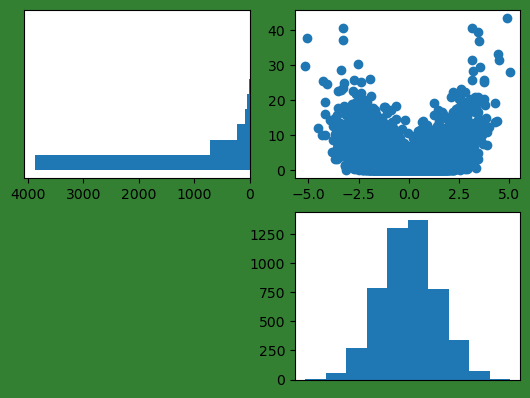

In [57]:
fig = plt.figure()                        # make the figure and name it fig
fig.set_facecolor(color=[.2,.50,.2])               # set the face color to gray

# y subplot
yhist_ax = plt.subplot(2,2,1)             # name our y histogram axes object
plt.hist(y, orientation = 'horizontal');
plt.yticks([])
yhist_ax.invert_xaxis()                   # have the axes invert its x axis

# x subplot()
plt.subplot(2,2,4)
plt.hist(x);
plt.xticks([])

# scatterplot subplot
plt.subplot(2,2,2)
plt.scatter(x,y);

You can use common color names to set the color of the background, but you can also use three numbers to set the rgb (red, green, and blue) values, and an optional fourth number to set the alpha (transparency). Try it in the code above!

Also, you can set the size of your figure when you make the figure. You might need to do this to make room for axis labels or titles.

#### making the figure your own.

Now it's time to have some fun. Starting with the above code, make this figure your own. The only requirements are:

* ~~put the scatter plot in the upper left, where it is most prominent~~
* ~~have the x and y value axes of the histograms closest to the scatter plot~~
* ~~put x and y axes labels on the scatter plot~~
* ~~tweak the scatter plot color, marker size, and/or alpha to get a nice plot~~
* ~~make the histogram colors match the scatter plot~~

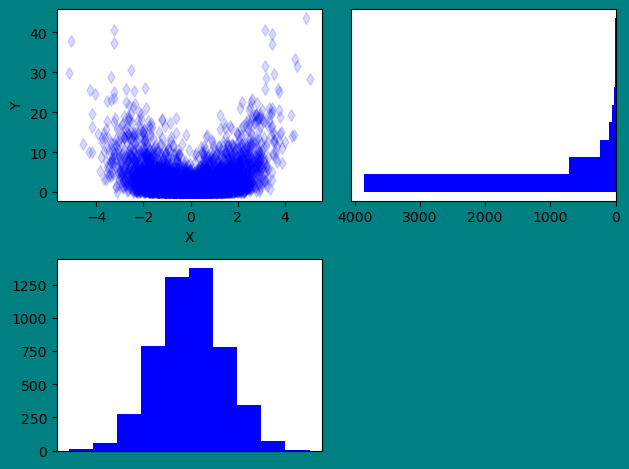

In [92]:
fig = plt.figure()                        # make the figure and name it fig
fig.set_facecolor(color= 'teal')               # set the face color to gray

# scatterplot subplot
plt.subplot(2,2,1)
plt.scatter(x,y,c='blue', alpha=.15, marker='d');
plt.xlabel('X')
plt.ylabel('Y')


# y subplot
yhist_ax = plt.subplot(2,2,2)             # name our y histogram axes object
plt.hist(y, color='blue', orientation = 'horizontal');
plt.yticks([])
yhist_ax.invert_xaxis()                   # have the axes invert its x axis

# x subplot()
plt.subplot(2,2,3)
plt.hist(x, color='blue');
plt.xticks([])

plt.tight_layout()

## Multi-axis figures: advanced methods 

The `plt.plot()` way of making multi-panel (`axes`) figures is great for simple figures, consisting of anything from 1 panel figures to a 2x2 panel figure or so, where each panel is the same size.

For more complicated figures, however, there are a few other ways to add multiple subplots to our figures that allow us more flexibility in terms of the sizes and layout of our subplots.

In this tutorial, we will cover two of primary methods, which are using

- `plt.subplots()` (note the 's' - `plt.subplots()` is different than `plt.subplot()`!), 
- a sub-plot mosaic (`subplot_mosaic()`), 

We'll also briefly describe the low-level method of using a "grid specification" (optional)

### as always, let's import our libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Adding subplots with `subplots()`

The "go to" alternative to `plt.subplot()` for figures with a simple grid of sub-plots with same size is `plt.subplots()`. This makes all of our subplots in one command, and gives us `axes` objects that we can use to do our plotting.

Run the following code:

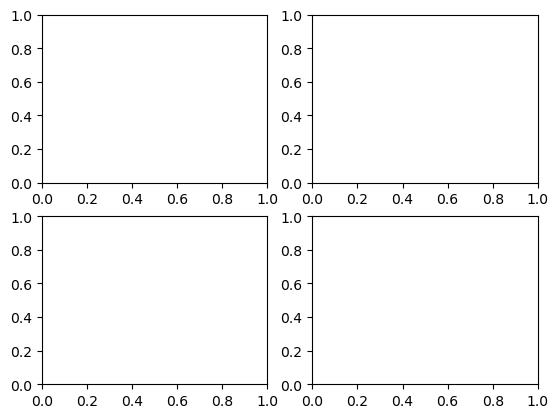

In [3]:
fig, axs = plt.subplots(ncols=2, nrows=2)

What has it done?

Notice that, in addition to making a 2x2 grid of axes, its return values have been assigned to `fig` and `axs` - let's look at these.

The first, `fig`, refers to the entire figure, and we can use it to do figure level stuff, like set the overall background color.

Now let's look at `axs`:

In [4]:
axs

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

Interesting, `axs` is an array! Like any other array, it has cells but, in this case, the cells contain the names of our `axes` objects. So if we wanted to do some plotting in the upper left cell, we would do `axs[0,0].plot(...)`, etc.

##### Note: 
`fig` and `axs` are just variable names, and you can use whatever names you wish. Just like with `np` and `plt`, however, coders generally use `"fig"` for the figure, `"ax"` for a single `axes`, and `"axs"` for multiple `axes` objects.

#### Let's make some stuff to plot:

In [96]:
x = np.linspace(-10, 10, 10)
y1 = x
y2 = x**2
y3 = x**3
y4 = x**4

In [97]:
x

array([-10.        ,  -7.77777778,  -5.55555556,  -3.33333333,
        -1.11111111,   1.11111111,   3.33333333,   5.55555556,
         7.77777778,  10.        ])

### Plotting in individual axes panels

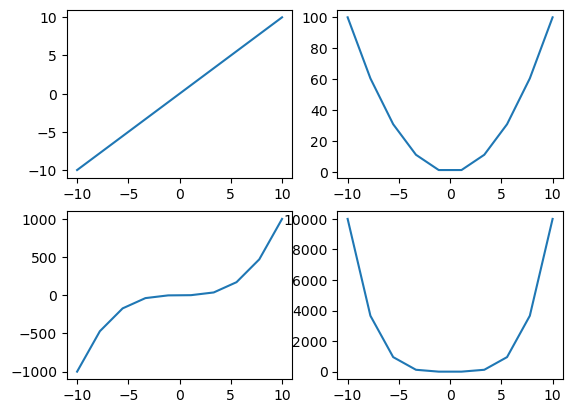

In [98]:
fig, axs = plt.subplots(ncols=2, nrows=2)

axs[0, 0].plot(x, y1);
axs[0, 1].plot(x, y2);
axs[1, 0].plot(x, y3);
axs[1, 1].plot(x, y4);

So what advantages does this have over using `plt.subplot()`? We can see two right now. 

First, we don't have to re-specify the same grid every time we plot. 

Second, and more importantly, *we address the `axes` exactly as they are laid out in the figure* - we refer to each individual `axes` by it's location in the figure.

A little pair of `for` loops will illustrate this nicely. We'll loop through the rows and columns, and put an annotation on each `axes` labeling it. Run the code below, and then *make sure you understand how the indexing is working before moving on*.

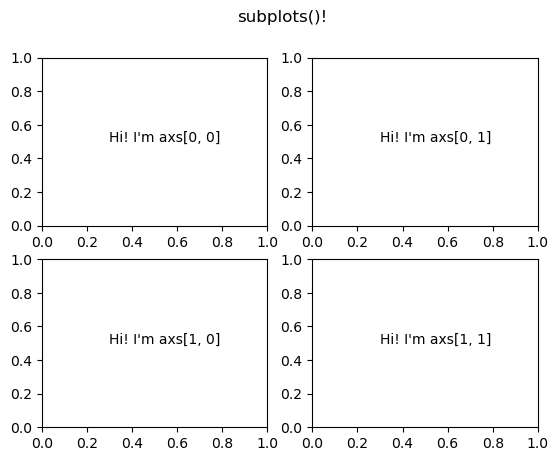

In [99]:
fig, axs = plt.subplots(ncols=2, nrows=2)

for row in range(2):
    for col in range(2):
        axs[row, col].text(0.3, 0.5, f'Hi! I\'m axs[{row}, {col}]')

fig.suptitle('subplots()!');

Notice that we also used `fig` to put a title on the whole figure.

But wait! There's more! If we can easily address our plots with `for` loops, why not automatically grab and plot our data using the `for` loops as well? To do this, we'll just put our data in a nested Python list that has exactly the same 2x2 structure as our figure.

In [100]:
y = [[y1, y2],
    [y3, y4]]

And now we add our plotting into in the inner `for` loop, grabbing the data with `y[row][column]` as we go.

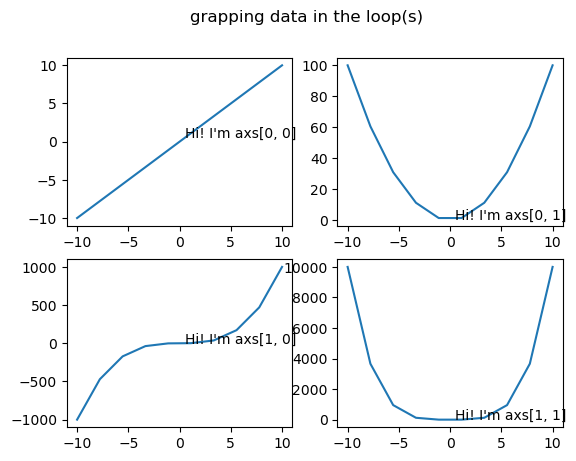

In [101]:
fig, axs = plt.subplots(ncols=2, nrows=2)

for row in range(2):
    for col in range(2):
        axs[row, col].plot(x, y[row][col])
        axs[row, col].text(0.5, 0.5, f'Hi! I\'m axs[{row}, {col}]')

fig.suptitle('grapping data in the loop(s)');

Now that we have all our plotting and annotating in one place, we can add or change things that will automatically affect all the plots. No need to copy and paste!

For example, you may have noticed above that the positions of our annotations got messed up. This is because the positions were set assuming that the x and y axes both went from 0 to 1, which is no longer true. But we can tell our annotation to use the zero-to-one coordinate system instead of using data coordinates by using the `transform` property that `artists` have.

We can also make all our plots light blue, just for the heck of it.

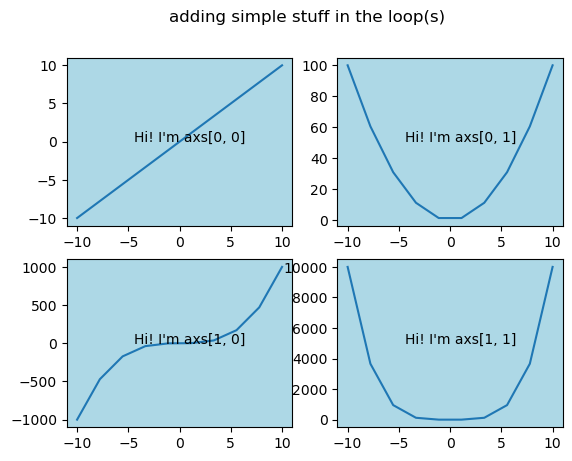

In [123]:
fig, axs = plt.subplots(ncols=2, nrows=2)

for row in range(2):
    for col in range(2):
        axs[row, col].plot(x, y[row][col])
        axs[row, col].text(0.3, 0.5, f'Hi! I\'m axs[{row}, {col}]', 
                           transform=axs[row, col].transAxes)        # tell the text to use 0-1 coords
        axs[row, col].set_facecolor('lightblue')
        
fig.suptitle('adding simple stuff in the loop(s)');

We can get even fancier by storing plot customizations like lines, markers, font sizes, etc. so that we can access them with our loop(s).

In [103]:
lspec = [['r:', 'b-o'], ['k--d', 'gs']]

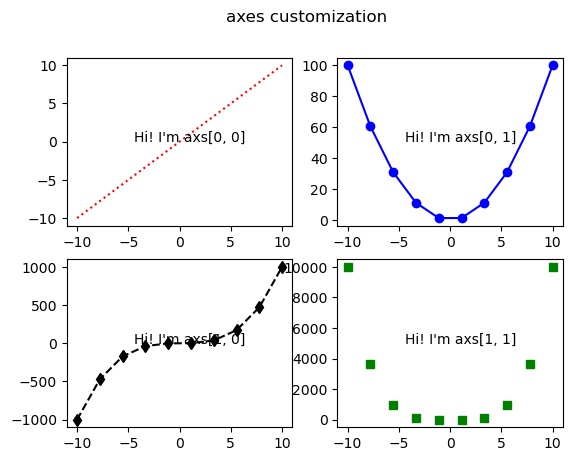

In [104]:
fig, axs = plt.subplots(ncols=2, nrows=2)

for row in range(2):
    for col in range(2):
        axs[row, col].plot(x, y[row][col], lspec[row][col])
        axs[row, col].text(0.3, 0.5, f'Hi! I\'m axs[{row}, {col}]', 
                           transform=axs[row, col].transAxes)
                           
fig.suptitle('axes customization');

---

In the code cell below, make something about the text (e.g. font size, color) different for each plot. Don't cheat: do it inside the for loops!

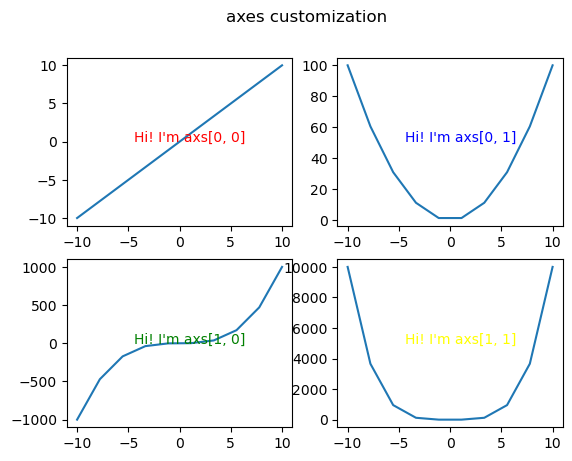

In [122]:
text_alt = [['red', 'blue'], ['green', 'yellow']]
fig, axs = plt.subplots(ncols=2, nrows=2)

for row in range(2):
    for col in range(2):
        axs[row, col].plot(x, y[row][col])
        axs[row, col].text(0.3, 0.5, f'Hi! I\'m axs[{row}, {col}]', color=text_alt[row][col],
                           transform=axs[row, col].transAxes), 
        
fig.suptitle('axes customization');

---

#### Making room for annotations

You can specify the overall size of the figure. We often want to make it larger than the default in order to make room for axis labels and suchlike.

There is also an option to set the layout of the figure to be "constrained" – this tries to adjust things so that everything fits in the figure without overlapping.

Here, we'll bump the figure size up and set the layout to "constrained" and take a look.

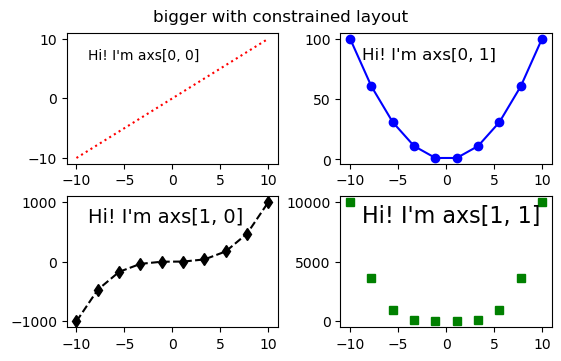

In [124]:
lspec = [['r:', 'b-o'], ['k--d', 'gs']]
fsizes = [[10, 12], [14, 16]]

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(5.5, 3.5),
                        layout="constrained")
# add an artist, in this case a nice label in the middle...
for row in range(2):
    for col in range(2):
        axs[row, col].plot(x, y[row][col], lspec[row][col])
        axs[row, col].text(0.1, 0.8, f'Hi! I\'m axs[{row}, {col}]', 
                           transform=axs[row, col].transAxes,
                           fontsize = fsizes[row][col])

fig.suptitle('bigger with constrained layout');

#### Setting the aspect ratio of plots (and flat iteration)

Sometimes we want to set the aspect ratio (height/width) of plots ourselves. We might want the plots to be square, for example, so that the unit circle looks like a circle and not an ellipse.

Below, we'll set all the `axes` to have an aspect ratio of 1.0. Because we want to do exactly the same thing to every plot, we don't need to keep track of which row or column we are in, we just need to step through the plots. For these situations, the `axs` array created by `sub_plots()` can generate an iterator, `axs.flat`, that we can use with a single `loop` to go through our plots.

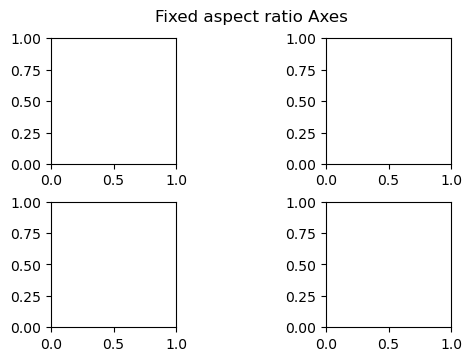

In [125]:
fig, axs = plt.subplots(2, 2, layout="constrained", figsize=(5.5, 3.5))

for ax in axs.flat:
    ax.set_aspect(1)

fig.suptitle('Fixed aspect ratio Axes');

#### Tightening up the layout

We can play around with the figure size to clean things up. In the code cell below, play around with the figure size to make a plot layout that has room, but not too much room, for annotations.

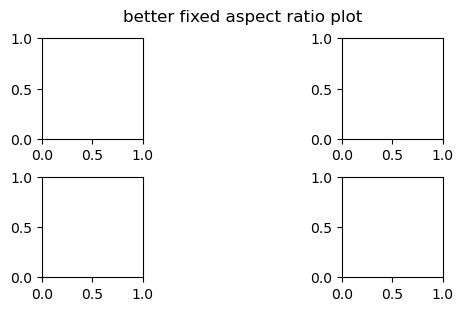

In [5]:
fig, axs = plt.subplots(2, 2, layout="constrained", figsize=(6, 3))

for ax in axs.flat:
    ax.set_aspect(1)

fig.suptitle('better fixed aspect ratio plot');

#### Setting a panel to blank

Sometimes we might not need one of our subplots. For example, what if want to show a scatter plot along with histograms of the x and y values? In this case, we can just turn of the `axis` objects for that `axes`:

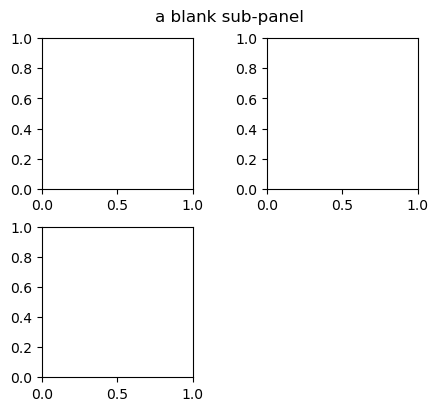

In [6]:
fig, axs = plt.subplots(2, 2, layout="constrained", figsize=(4.5, 4.0))

for ax in axs.flat:
    ax.set_aspect(1)

axs[1,1].axis('off')
fig.suptitle('a blank sub-panel');

---

### making a complete figure

Recycling some of the code from above, make a nice plot that shows the first four polynomials in four subplots. The figure should include x- and y-axis labels, titles for the subplots, etc. Tinker with it until looks nice and isn't cluttered. (Remember, you don't necessarily need axis labels for every subplot if some of them are redundant.

Text(0, 0.5, 'Y^4')

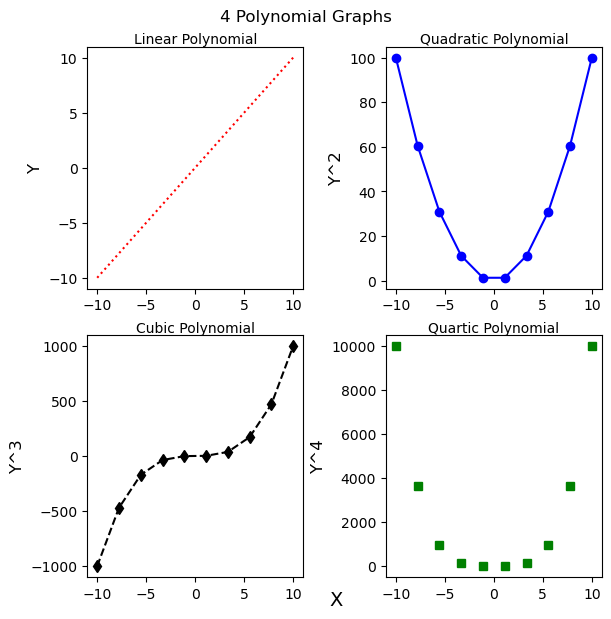

In [87]:
import numpy as np
#form data
x = np.linspace(-10, 10, 10)
y1 = x
y2 = x**2
y3 = x**3
y4 = x**4

y = [[y1, y2],
    [y3, y4]]
    
lspec = [['r:', 'b-o'], ['k--d', 'gs']]
fsizes = [[10, 12], [14, 16]]

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(6, 6),
                        layout="constrained")
fig.text(0.55, 0.0, 'X', ha='center', fontsize=14)

for row in range(2):
    for col in range(2):
        axs[row, col].plot(x, y[row][col], lspec[row][col])
        
fig.suptitle('4 Polynomial Graphs');


axs[0,0].text(0.5, 1, "Linear Polynomial",horizontalalignment='center',
     verticalalignment='bottom',transform=axs[0, 0].transAxes)

axs[0,1].text(0.5, 1,"Quadratic Polynomial",horizontalalignment='center',
     verticalalignment='bottom', transform=axs[0, 1].transAxes)

axs[1,0].text(0.5, 1,"Cubic Polynomial",horizontalalignment='center',
     verticalalignment='bottom', transform=axs[1, 0].transAxes)

axs[1,1].text(0.5, 1,"Quartic Polynomial",horizontalalignment='center',
     verticalalignment='bottom', transform=axs[1, 1].transAxes)


axs[0, 0].set_ylabel('Y', fontsize=12)
axs[0, 1].set_ylabel('Y^2', fontsize=12)
axs[1, 0].set_ylabel('Y^3', fontsize=12)
axs[1, 1].set_ylabel('Y^4', fontsize=12)


---

### Adding subplots with `subplot_mosaic()`

While `subplots()` returns an array of `axes` objects that we address by indexing, `subplot_mosaic()` offers us an alternative that returns a Python *dict* that we address by its keys. 

We provide the dict keys we want to `subplot_mosaic()` in a Python list that specifies the plot layout we want.

Like this.

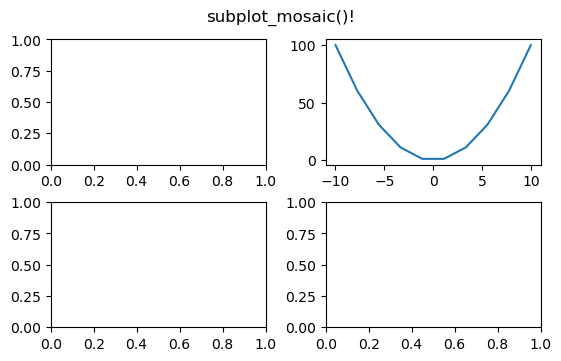

In [89]:
fig, axd = plt.subplot_mosaic([['line', 'parabola'],
                               ['cubic', 'quartic']],
                              figsize=(5.5, 3.5), layout="constrained")

axd['parabola'].plot(x, y2)
    
fig.suptitle('subplot_mosaic()!');

Note that here we named our dictionary of `axes` objects "`axd`". Let's look at it.

In [90]:
axd

{'line': <Axes: label='line'>,
 'parabola': <Axes: label='parabola'>,
 'cubic': <Axes: label='cubic'>,
 'quartic': <Axes: label='quartic'>}

So it contains the same sort of `axes` objects (the "AxesSubplot" things), but just in a dictionary instead of an array.

We can still loop through our plots to do stuff, but because the plots are addressed by name (key) instead of position (row and column), we can do it with a single loop.

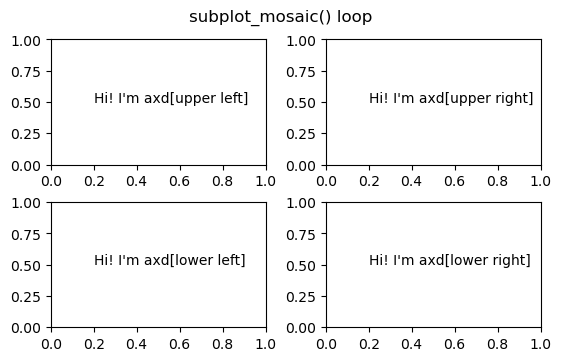

In [91]:
fig, axd = plt.subplot_mosaic([['upper left', 'upper right'],
                               ['lower left', 'lower right']],
                              figsize=(5.5, 3.5), layout="constrained")
for k in axd:
    axd[k].text(0.2, 0.5, f'Hi! I\'m axd[{k}]')
    
fig.suptitle('subplot_mosaic() loop');

---

In the code cell below, use `subplot_mosaic` and a `for` loop to make a figure with four plots (line through quartic), like the ones we made with `subplots()` above. 

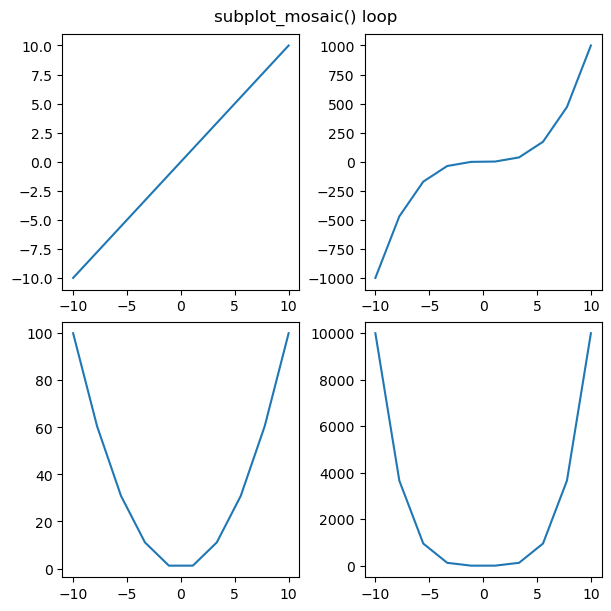

In [100]:

x = np.linspace(-10, 10, 10)
y1 = x
y2 = x**2
y3 = x**3
y4 = x**4

y = [[y1, y2],
    [y3, y4]]

    
datad = {'line': y1, 'parabola': y2, 'cubic': y3, 'quartic': y4}        # dictionary for accessing data

fig, axd = plt.subplot_mosaic([['line', 'cubic'],        # make 'cubic' span rows of right column
                               ['parabola', 'quartic']],
                              figsize=(6, 6), layout="constrained")
for k in axd:
    axd[k].plot(x, datad[k])

fig.suptitle('subplot_mosaic() loop');

(hint: you'll need to change the way the data are stored)

---

### Making fancier layouts with `subplot_mosaic`

A really great thing about using `subplot_mosaic()` is that we can have a single subplot span multiple rows or columns of the figure just by naming them accordingly:

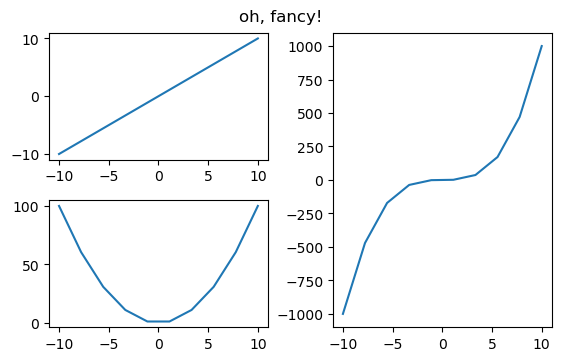

In [94]:
datad = {'line': y1, 'parabola': y2, 'cubic': y3}        # dictionary for accessing data

fig, axd = plt.subplot_mosaic([['line', 'cubic'],        # make 'cubic' span rows of right column
                               ['parabola', 'cubic']],
                              figsize=(5.5, 3.5), layout="constrained")
for k in axd:
    axd[k].plot(x, datad[k])

fig.suptitle('oh, fancy!');

### Finer control with a grid specification (gridspec)

We can have finer control over our rows and columns using a "grid specification". Using `subplot_mosaic()`, we can specify some details of the figure layout using the optional `gridspec_kw` argument. This argument takes a dictionary that allows us to specify the relative sizes of the rows and columns and the spacing between them.

In the example below, we'll make left column and the top row relatively small:

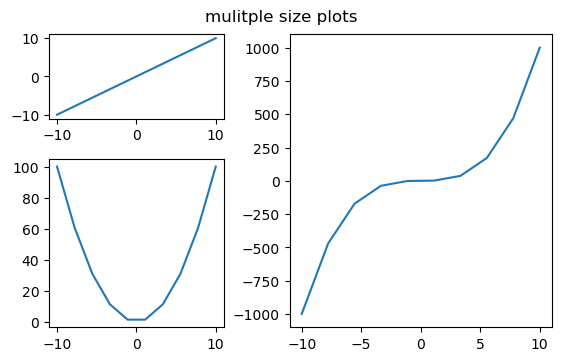

In [112]:
datad = {'line': y1, 'parabola': y2, 'cubic': y3}

gs_kw = dict(width_ratios=[1, 1.5], height_ratios=[1, 2]) # dict to set relative sizes of cols and rows

fig, axd = plt.subplot_mosaic([['line', 'cubic'],
                               ['parabola', 'cubic']],
                              gridspec_kw=gs_kw,         # passing the dict to subplot_mosaic
                              figsize=(5.5, 3.5), 
                              layout="constrained")

for k in axd:
    axd[k].plot(x, datad[k])

fig.suptitle('mulitple size plots');

Each number in the xxx_ratios entry is the size of a row or column relative to the total height or width of the figure. So, in the example above, the top row is 1/3 of the figure and the bottom row is 2/3.

Crucially, we can also specify the amount of spacing between the rows and columns (to make room for labels, etc.).

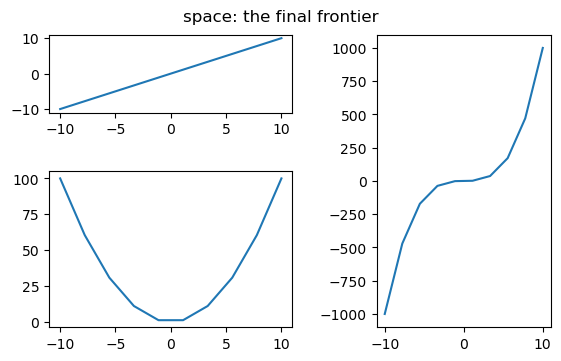

In [105]:
datad = {'line': y1, 'parabola': y2, 'cubic': y3}

gs_kw = dict(width_ratios=[1.4, 1], 
             height_ratios=[1, 2],
             wspace=0.1, hspace=0.1)                   # spacing between the rows and cols

fig, axd = plt.subplot_mosaic([['line', 'cubic'],
                               ['parabola', 'cubic']],
                              gridspec_kw=gs_kw, 
                              figsize=(5.5, 3.5), 
                              layout="constrained")

for k in axd:
    axd[k].plot(x, datad[k])
    

fig.suptitle('space: the final frontier');

---

In the cell below, improve the figure above with annotations (axis labels, etc.)

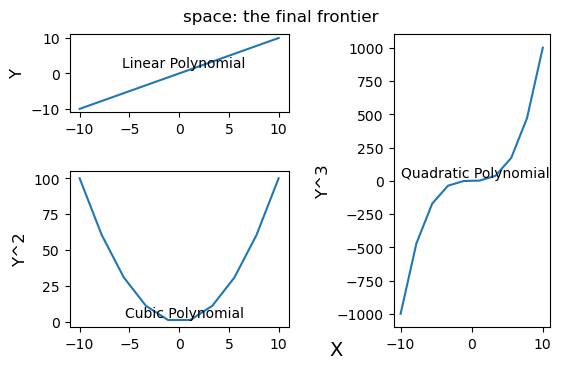

In [139]:
datad = {'line': y1, 'parabola': y2, 'cubic': y3}

gs_kw = dict(width_ratios=[1.4, 1], 
             height_ratios=[1, 2],
             wspace=0.1, hspace=0.1)                   # spacing between the rows and cols

fig, axd = plt.subplot_mosaic([['line', 'cubic'],
                               ['parabola', 'cubic']],
                              gridspec_kw=gs_kw, 
                              figsize=(5.5, 3.5), 
                              layout="constrained")

for k in axd:
    axd[k].plot(x, datad[k])

fig.text(0.6, 0.0, 'X', ha='center', fontsize=14)

    
axd['line'].set_ylabel('Y', fontsize=12)
axd['parabola'].set_ylabel('Y^2', fontsize=12)
axd['cubic'].set_ylabel('Y^3', fontsize=12)

axd['line'].text(0.5, 1, "Linear Polynomial",horizontalalignment='center',
     verticalalignment='bottom')

axd['cubic'].text(0.5, 1,"Quadratic Polynomial",horizontalalignment='center',
     verticalalignment='bottom')

axd['parabola'].text(0.5, 1,"Cubic Polynomial",horizontalalignment='center',
     verticalalignment='bottom')

     

fig.suptitle('space: the final frontier');

---

### Adding individual subplots with a gridspec (optional)

Finally, we can add subfigures manually by 

* making a figure
* adding a gridspec to the figure
* adding plots by specifying their locations on the gridspec using numpy indexing

This "low level" method is actually what happens behind the curtain when we specify a `gridspec_kw` argument as we did above.

Here's an example:

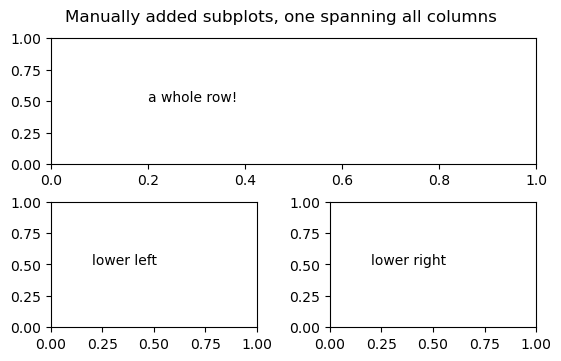

In [7]:
fig = plt.figure(figsize=(5.5, 3.5), layout="constrained")  # make a figure
spec = fig.add_gridspec(2, 2)                               # specify the grid of subplots

ax0 = fig.add_subplot(spec[0, :])                           # a subplot spanning the whole first row
ax0.text(0.2, 0.5, "a whole row!")

ax10 = fig.add_subplot(spec[1, 0])
ax10.text(0.2, 0.5, "lower left")

ax11 = fig.add_subplot(spec[1, 1])
ax11.text(0.2, 0.5, "lower right")

fig.suptitle('Manually added subplots, one spanning all columns');

We can also specify the heights, widths, spacing, etc. in the call to `fig.add_gridspec()`. 

## Summary

In this tutorial, we have learned the `matplotlib` techniques for figures containing multiple `axes` panels for plotting.
It seems like a **lot**, but these are key techinques. Remember, though, you don't need to memorize everything! In general, for a given project, you will 

* settle on specific layout or layouts for the figures you want
* write the code, *once*, to make a figure for given input data
* embed the code for each layout in a `function`, so you can easily reuse the code as often as needed!